<a href="https://colab.research.google.com/github/lourdesarteaga/ETL-Bitcoin-Project/blob/main/Osos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import requests        # for making http requests to binance
import json            # for parsing what binance sends back to us
import pandas as pd    # for storing and manipulating the data we get back
import numpy as np     # numerical python, i usually need this somewhere 
                       # and so i import by habit nowadays

import matplotlib.pyplot as plt # for charts and such
import datetime as dt  # for dealing with times


In [5]:
root_url = 'https://api.binance.com/api/v1/klines'

In [6]:
symbol = 'BTCUSDT'

interval = '1d'

url = root_url + '?symbol=' + symbol + '&interval=' + interval
print(url)

https://api.binance.com/api/v1/klines?symbol=BTCUSDT&interval=1d


In [7]:
data = json.loads(requests.get(url).text)

In [8]:
df = pd.DataFrame(data)
df.columns = ['open_time',
              'o', 'h', 'l', 'c', 'v',
              'close_time', 'qav', 'num_trades',
              'taker_base_vol', 'taker_quote_vol', 'ignore']

df.index = [dt.datetime.fromtimestamp(x/1000.0) for x in df.close_time]

In [9]:
# function to download the data for whatever symbol we want

def get_bars(symbol, interval = '1d'):
   url = root_url + '?symbol=' + symbol + '&interval=' + interval
   data = json.loads(requests.get(url).text)
   df = pd.DataFrame(data)
   df.columns = ['open_time',
                 'o', 'h', 'l', 'c', 'v',
                 'close_time', 'qav', 'num_trades',
                 'taker_base_vol', 'taker_quote_vol', 'ignore']
   df.index = [dt.datetime.fromtimestamp(x/1000.0) for x in df.close_time]
   return df

In [10]:
# to download the data for BTC/USDT

btcusdt = get_bars('BTCUSDT')

In [11]:
btcusdt

,open_time,o,h,l,c,v,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
2020-11-06 23:59:59.999,1604620800000,15590.02000000,15960.00000000,15166.00000000,15579.92000000,122618.19769500,1604707199999,1909660728.82292043,1654968,58528.76053300,911733812.27929558,0
2020-11-07 23:59:59.999,1604707200000,15579.93000000,15753.52000000,14344.22000000,14818.30000000,101431.20655300,1604793599999,1536510177.09147370,1557021,46204.87062100,700220031.30034720,0
2020-11-08 23:59:59.999,1604793600000,14818.30000000,15650.00000000,14703.88000000,15475.10000000,65547.17857400,1604879999999,998031373.83978030,998773,31175.66089200,474978556.38937917,0
2020-11-09 23:59:59.999,1604880000000,15475.10000000,15840.00000000,14805.54000000,15328.41000000,108976.33413400,1604966399999,1670447935.51417895,1505441,51350.44664100,787324390.76709841,0
2020-11-10 23:59:59.999,1604966400000,15328.41000000,15460.00000000,15072.46000000,15297.21000000,61681.91960600,1605052799999,943615126.08915049,1093466,28945.76656700,442891690.01260021,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-16 23:59:59.999,1647388800000,39280.33000000,41718.00000000,38828.48000000,41114.00000000,88120.76167000,1647475199999,3552563766.36553840,2051837,44119.65664000,1779529342.31891760,0
2022-03-17 23:59:59.999,1647475200000,41114.01000000,41478.82000000,40500.00000000,40917.90000000,37189.38087000,1647561599999,1521083189.71086230,935784,18580.98075000,760015585.80298390,0
2022-03-18 23:59:59.999,1647561600000,40917.89000000,42325.02000000,40135.04000000,41757.51000000,45408.00969000,1647647999999,1862337033.48472110,1065054,22374.92757000,918115615.04648450,0
2022-03-19 23:59:59.999,1647648000000,41757.51000000,42400.00000000,41499.29000000,42201.13000000,29067.18108000,1647734399999,1216709156.44280540,801197,14463.06148000,605480703.88597740,0


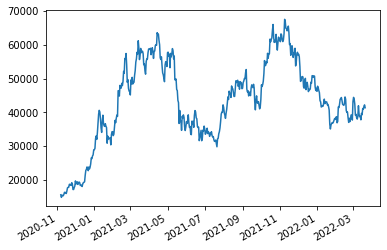

In [12]:
btcusdt['c'].astype('float').plot()

Now with the get_bars function you can download data for whatever symbols Binance supports. You can also change the interval parameter, which is set to ‘1h’ or 1 hour by default.

In [14]:
def get_bars(symbol, interval = '1d'):
   root_url = 'https://api.binance.com/api/v1/klines'
   url = root_url + '?symbol=' + symbol + '&interval=' + interval
   data = json.loads(requests.get(url).text)
   df = pd.DataFrame(data)
   df.columns = ['open_time',
                 'o', 'h', 'l', 'c', 'v',
                 'close_time', 'qav', 'num_trades',
                 'taker_base_vol', 'taker_quote_vol', 'ignore']
   df.index = [dt.datetime.fromtimestamp(x/1000.0) for x in df.close_time]
   return df

btcusdt = get_bars('BTCUSDT')
btcusdt1 = btcusdt['c'].astype('float')

In [15]:
btcusdt1

2020-11-06 23:59:59.999    15579.92
2020-11-07 23:59:59.999    14818.30
2020-11-08 23:59:59.999    15475.10
2020-11-09 23:59:59.999    15328.41
2020-11-10 23:59:59.999    15297.21
                             ...   
2022-03-16 23:59:59.999    41114.00
2022-03-17 23:59:59.999    40917.90
2022-03-18 23:59:59.999    41757.51
2022-03-19 23:59:59.999    42201.13
2022-03-20 23:59:59.999    41400.01
Name: c, Length: 500, dtype: float64